In [8]:
import numpy as np
import math

In [9]:
imax = 21
jmax = 21
x = np.zeros((imax,jmax))
y = np.zeros((imax,jmax))
qab = np.zeros((imax,jmax))
pab = np.zeros((imax,jmax))
qbc = np.zeros((imax,jmax))
pbc = np.zeros((imax,jmax))
qcd = np.zeros((imax,jmax))
pcd = np.zeros((imax,jmax))
qda = np.zeros((imax,jmax))
pda = np.zeros((imax,jmax))
phi = np.zeros((imax,jmax))
phi_new = np.zeros((imax,jmax))
phix = np.zeros((imax,jmax))

In [10]:
nmax = 100
rw = 0.1
rx = 1.0
ry = 1.0
rz = 0.1
theb = 0.0
then = 90.0
eps = 0.0001
om = 1.5

In [11]:
aim = imax - 1
ajm = jmax - 1
drwx = (rx - rw)/aim
drzy = (ry - rz)/aim
dth = (then-theb)/ajm
pi = math.pi

for j in range(jmax):
    thj = (theb + j*dth)*pi/180
    cj = math.cos(thj)
    sj = math.sin(thj)
    dr = drwx + (drzy - drwx)*j/ajm
    rwz = rw + (rz - rw)*j/ajm
    for i in range(imax):
        r = rwz + i*dr
        x[i, j] = r*cj
        y[i,j] = r*sj
        phix[i,j] = sj/r
phi = np.copy(phix)
phi[:,0] = 0
phi[:, -1] = phix[:,-1]
phi[0, :] = phix[0, :]
phi[-1, :] = phix[-1, :]


phi_new = np.copy(phi)

In [12]:
#	set grid related parameters
 
for j in range(1, jmax-1):
    for i in range(1, imax-1):
        xa = 0.25*(x[i,j] + x[i-1,j] + x[i-1,j-1] + x[i,j-1])
        ya = 0.25*(y[i,j] + y[i-1,j] + y[i-1,j-1] + y[i,j-1])
        xb = 0.25*(x[i,j] + x[i,j-1] + x[i+1,j-1] + x[i+1,j])
        yb = 0.25*(y[i,j] + y[i,j-1] + y[i+1,j-1] + y[i+1,j])
        xc = 0.25*(x[i,j] + x[i+1,j] + x[i+1,j+1] + x[i,j+1])
        yc = 0.25*(y[i,j] + y[i+1,j] + y[i+1,j+1] + y[i,j+1])
        xd = 0.25*(x[i,j] + x[i,j+1] + x[i-1,j+1] + x[i-1,j])
        yd = 0.25*(y[i,j] + y[i,j+1] + y[i-1,j+1] + y[i-1,j])
 
	    # side ab 
        dxa = xb - xa
        dya = yb - ya
        dxj = x[i,j] - x[i,j-1]
        dyj = y[i,j] - y[i,j-1]
        sab = abs(dxa*dyj - dxj*dya)
        qab[i,j] = (dxa*dxa + dya*dya)/sab
        pab[i,j] = (dxa*dxj + dya*dyj)/sab
  
        # side bc 
        dxb = xc - xb
        dyb = yc - yb
        dxi = x[i,j] - x[i+1,j]
        dyi = y[i,j] - y[i+1,j]
        sbc = abs(dyi*dxb - dxi*dyb)
        qbc[i,j] = (dxb*dxb + dyb*dyb)/sbc
        pbc[i,j] = (dxb*dxi + dyb*dyi)/sbc

        # side cd
        dxc = xd - xc
        dyc = yd - yc
        dxj = x[i,j] - x[i,j+1]
        dyj = y[i,j] - y[i,j+1]
        scd = abs(dxc*dyj - dyc*dxj) 
        qcd[i,j] = (dxc*dxc + dyc*dyc)/scd
        pcd[i,j] = (dxc*dxj + dyc*dyj)/scd
 
        # side da
        dxd = xa - xd
        dyd = ya - yd
        dxi = x[i,j] - x[i-1,j]
        dyi = y[i,j] - y[i-1,j]
        sda = abs(dxi*dyd - dyi*dxd)
        qda[i,j] = (dxd*dxd + dyd*dyd)/sda
        pda[i,j] = (dxd*dxi + dyd*dyi)/sda

In [13]:
# iterate using sor
for n in range(nmax):
    sum = 0
    for j in range(1, jmax-1):
          for j in range(1, imax-1):
              phd = 0.25*(pcd[i,j]-pda[i,j])*phi[i-1,j+1]
              phd = phd + (qcd[i,j] + 0.25*(pbc[i,j]-pda[i,j]))*phi[i,j+1]
              phd = phd + 0.25*(pbc[i,j]-pcd[i,j])*phi[i+1,j+1]
              phd = phd + (qda[i,j] + 0.25*(pcd[i,j]-pab[i,j]))*phi[i-1,j]
              phd = phd + (qbc[i,j] + 0.25*(pab[i,j]-pcd[i,j]))*phi[i+1,j]
              phd = phd + 0.25*(pda[i,j] - pab[i,j])*phi[i-1,j-1]
              phd = phd + (qab[i,j] + 0.25*(pda[i,j]-pbc[i,j]))*phi[i,j-1]
              phd = phd + 0.25*(pab[i,j] - pbc[i,j])*phi[i+1,j-1]
              phd = phd/(qab[i,j]+qbc[i,j]+qcd[i,j]+qda[i,j])
              #phi_new[i,j] = phd
              dif = phd - phi[i,j]
              sum = sum + dif*dif
              phi[i,j] = phi[i,j] + om*dif
              
    #diff = phi_new-phi
    #rms = math.sqrt((np.sum(np.square(diff)))/(aim*ajm))
    rms = math.sqrt(sum/(aim*ajm))
    if(rms < eps):
        itr = n+1;
        break
    else:
        continue
    #phi = phi + om*diff

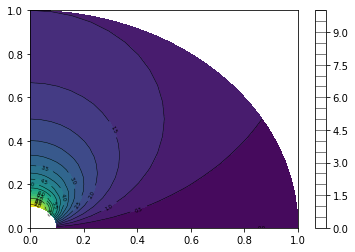

In [14]:
import matplotlib.pyplot as plt

plt.contourf(x, y, phi, 20)
CS = plt.contour(x, y, phi, 20, colors='black', linewidths=0.5)
plt.colorbar()
plt.clabel(CS, inline=1, fontsize=5)
plt.savefig("phi2.pdf")